In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
from scipy.stats import chi2_contingency,chi2
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

### Load the dataset

In [108]:
data =pd.read_csv("bank-additional-full-1.csv",sep=';')

In [109]:
# Set Pandas to display all columns
pd.set_option('display.max_columns', None)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [110]:
data.shape

(41199, 21)

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

### Handling Missing Values

In [112]:
missing_val = data.isnull().sum()
missing_val

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

Since all columns have missing values, handling these values individually for each column can be repetitive.So, we use a loop to handle missing values based on the column data type. 

The steps are as follows:
1. **Exclude Target Variable**: Remove the target variable column from the list of columns to process.
2. **Handle Missing Values**:
   - For numerical columns (`float64` type), fill missing values with the rounded median.
   - For categorical columns (`object` type), fill missing values with the mode (most frequent value).
3. **Verification**: Check if any missing values remain after the imputation process.

In [113]:
Null_col = list(data.columns)
Null_col.remove('y')

In [114]:
for col in Null_col:
    if data[col].dtype == 'float64' :
        # Fill missing values in numerical columns with the median
        median_val = round(data[col].median())
        data[col] = data[col].fillna(median_val)
    elif data[col].dtype == 'object':
        # Fill missing values in categorical columns with the mode
        data[col] = data[col].fillna(data[col].mode()[0])

In [115]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 3
dtype: int64

In [116]:
# List of columns to check for outliers
col = list(data.columns)
col.remove('y')

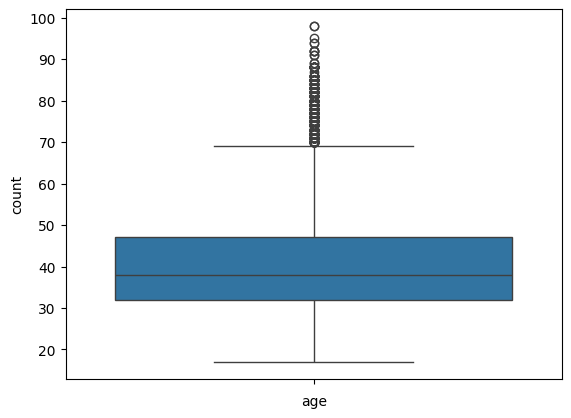

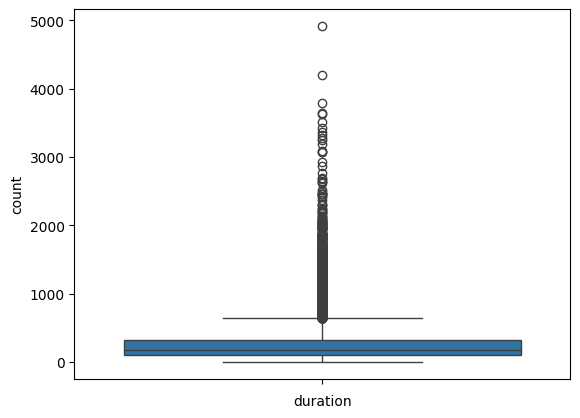

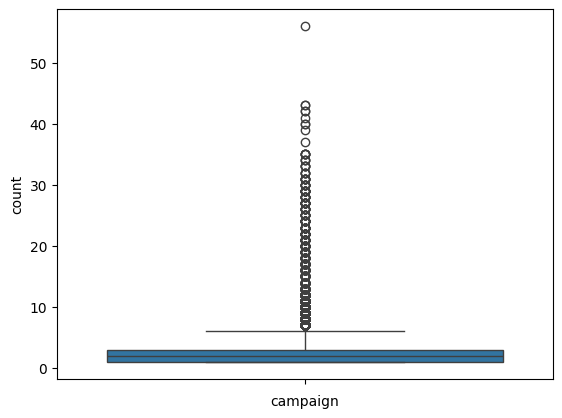

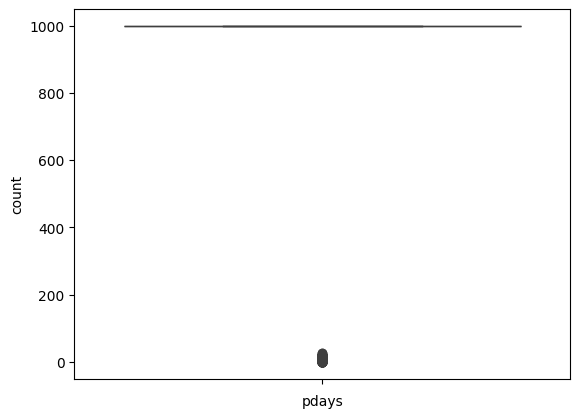

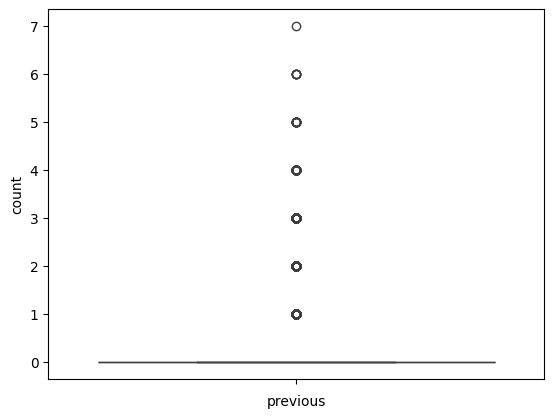

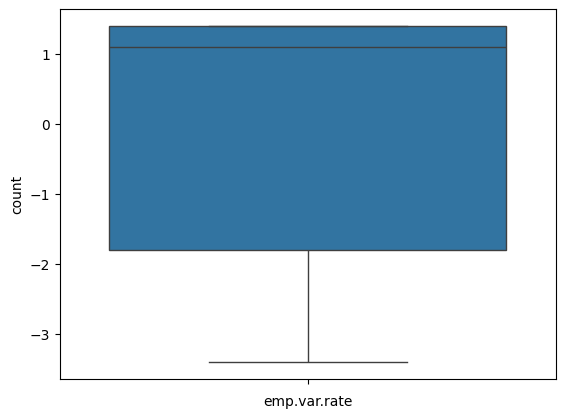

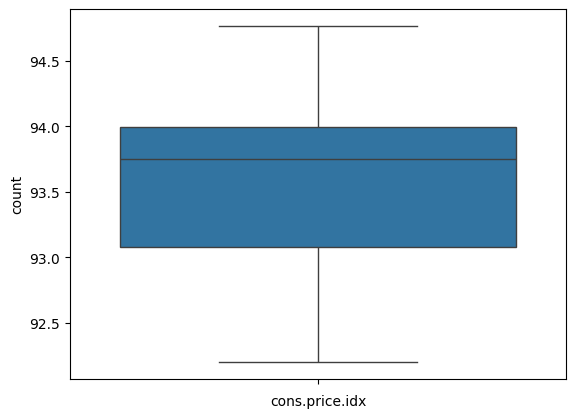

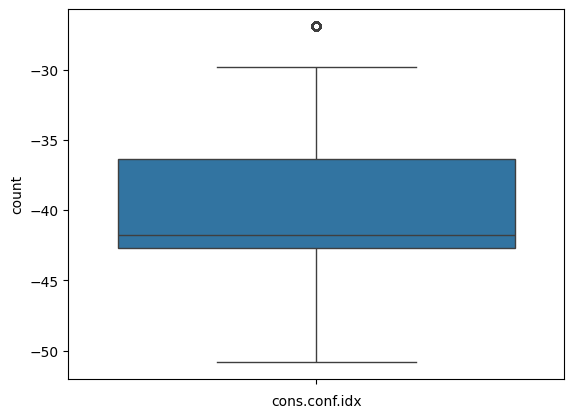

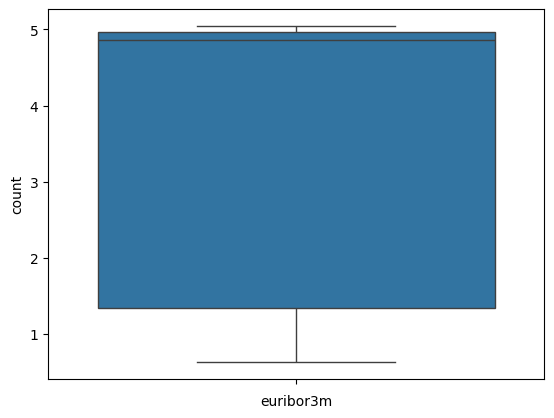

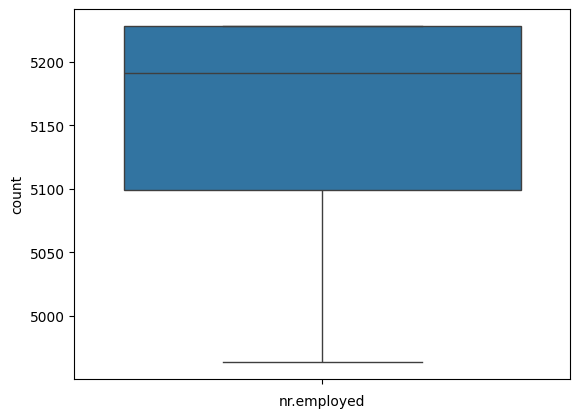

In [117]:
# check for outliers
for col_name in col:
    if (data[col_name].dtype=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

- IQR = Q3-Q1
- Upper Bound = Q3+1.5*IQR
- Lower Bound = Q1-1.5*IQR

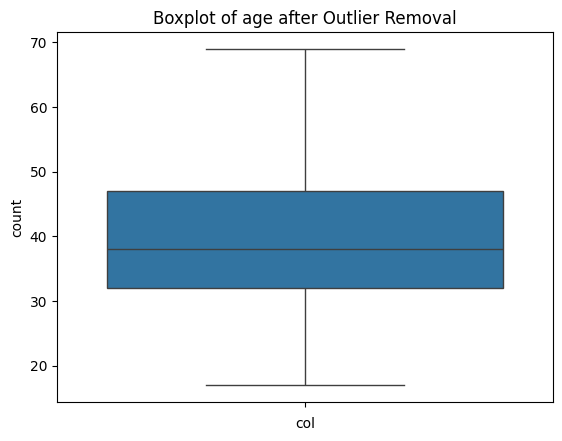

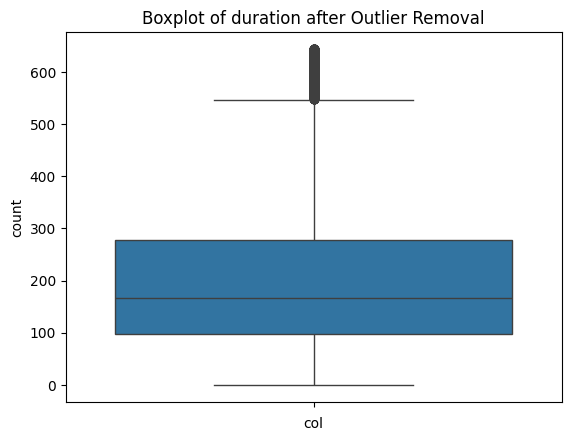

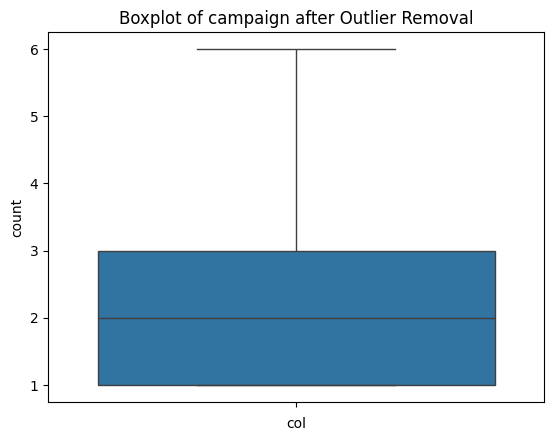

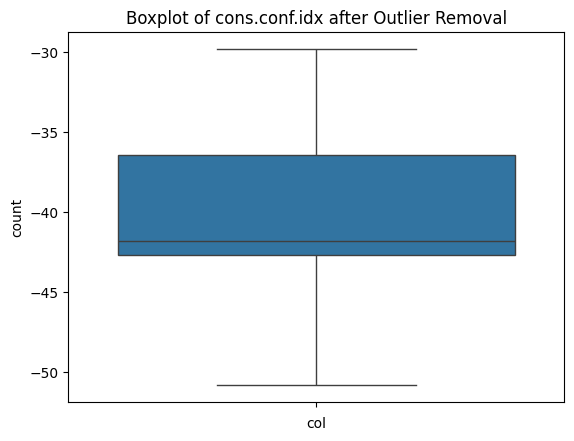

In [118]:
# List of columns for which to remove outliers
columns = ['age', 'duration', 'campaign', 'cons.conf.idx']

# Iterate through each column to remove outliers
for col in columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Filter the data to exclude outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    # Plot the boxplot
    sns.boxplot(data[col])
    plt.xlabel('col')
    plt.ylabel('count')
    plt.title(f'Boxplot of {col} after Outlier Removal')
    plt.show()

In [119]:
data.shape

(35180, 21)

### Feature selection

In [120]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Simplifying Age Grouping with Integer Division

The process of grouping ages into tens by directly applying integer division and multiplication. The approach `data['age'] // 10 * 10` converts any age value to the nearest lower ten, making it a simple and efficient way to categorize age values without the need for predefined bins and labels.

#### Example
- age 13 : it becomes 10
- age 21 : it becomes 20
- age 10 to 20 : 10, 20 to 30 : 20

In [121]:
data['age'] = data['age']//10 * 10

In [122]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,50.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,50.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,30.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,50.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [123]:
# The percentage distribution of each age value in age column
data['age'].value_counts()/len(data['age'])*100

age
30.0    41.677089
40.0    25.943718
50.0    16.768050
20.0    13.683911
60.0     1.725412
10.0     0.201819
Name: count, dtype: float64

### performing a chi-square test

- **Null Hypothesis(H0)** : No relationship betweenthe two categorical variables.
- **Alternative Hypothesis (H1)**: There is an effect or a relationship
- { chi2_stat >= critical_value or p_value < alpha } : reject null hypothesis ( it means there is a statistically significant relationship between the variables.)

In [124]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,50.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,50.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,30.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,50.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [125]:
l = [] # create a list

# define categorical columns from dataset
categorical_column = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week', 'poutcome']

for col in categorical_column:
    contingency_table = pd.crosstab(data[col], data['y'])

    # Perform the chi-square test
    chi2_stat, p_value, dof, Expected_Values =chi2_contingency(contingency_table)    
    
    # Calculate the critical value
    alpha = 0.05
    critical_value = chi2.ppf(q=1 - alpha, df=dof)

    # Append the result to the list
    l.append({'Feature': col, 'P-value': p_value, 'Chi2 Stat': chi2_stat, 'Critical Value': critical_value, 'Reject Null Hypothesis': p_value < alpha})

df = pd.DataFrame(l)
df

,Feature,P-value,Chi2 Stat,Critical Value,Reject Null Hypothesis
0,age,5.539578e-200,935.491018,11.070498,True
1,job,4.632073e-181,877.328349,19.675138,True
2,marital,2.044521e-40,187.569627,7.814728,True
3,education,2.545590e-59,292.393391,14.067140,True
4,default,5.021932e-97,443.473878,5.991465,True
5,housing,1.574268e-02,8.302760,5.991465,True
6,loan,3.383861e-01,2.167135,5.991465,False
7,contact,7.091301e-163,739.664528,3.841459,True
8,month,0.000000e+00,3503.842277,16.918978,True
9,day_of_week,1.425824e-03,17.678800,9.487729,True


In [21]:
# drop loan column because p value < alpha
data.drop(columns=['loan'],inplace=True)

### Categorical Variable Encoding using Label Encoding
    step 1 : Identify categorical columns
    step 2 : Initialize the LabelEncoder
    step 3 : Apply Label Encoding to each categorical column

In [97]:
# Identify categorical columns
Categorical_df = data.dtypes=='object'

# Extract the list of categorical columns and remove the target column 'y'
categorical_col = list(Categorical_df[Categorical_df].index)
categorical_col.remove('y')

le = LabelEncoder()
# Apply Label Encoding to each categorical column
for i in categorical_col:
  data[i]=le.fit_transform(data[i])

In [98]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,50.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,50.0,7,1,3,1,0,0,1,6,1,149.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,30.0,7,1,3,0,2,0,1,6,1,226.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,50.0,7,1,3,0,0,2,1,6,1,307.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35180 entries, 0 to 41197
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35180 non-null  float64
 1   job             35180 non-null  int64  
 2   marital         35180 non-null  int64  
 3   education       35180 non-null  int64  
 4   default         35180 non-null  int64  
 5   housing         35180 non-null  int64  
 6   contact         35180 non-null  int64  
 7   month           35180 non-null  int64  
 8   day_of_week     35180 non-null  int64  
 9   duration        35180 non-null  float64
 10  campaign        35180 non-null  float64
 11  pdays           35180 non-null  float64
 12  previous        35180 non-null  float64
 13  poutcome        35180 non-null  int64  
 14  emp.var.rate    35180 non-null  float64
 15  cons.price.idx  35180 non-null  float64
 16  cons.conf.idx   35180 non-null  float64
 17  euribor3m       35180 non-null  floa

### Variance Inflation Factor

In [113]:
x = data.drop(columns = ['y'])
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif_data

,features,vif
0,age,16.604271
1,job,2.100466
2,marital,5.634425
3,education,4.558075
4,default,1.407031
5,housing,2.208515
6,contact,2.941296
7,month,6.684920
8,day_of_week,3.100099
9,duration,3.230783


Drop highest value nr.employed : 43070.013033 from dataset

In [114]:
data = data.drop(['nr.employed'],axis = 1)

In [115]:
x = data.drop(columns = ['y'])
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif_data

,features,vif
0,age,16.598983
1,job,2.100222
2,marital,5.633715
3,education,4.556417
4,default,1.404419
5,housing,2.208194
6,contact,2.446144
7,month,5.782979
8,day_of_week,3.099216
9,duration,3.221019


Drop highest value cons.price.idx : 720.736479 from dataset

In [116]:
data = data.drop(['cons.price.idx'],axis = 1)

In [117]:
x = data.drop(columns = ['y'])
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif_data

,features,vif
0,age,15.940582
1,job,2.094702
2,marital,5.509994
3,education,4.503251
4,default,1.404239
5,housing,2.206407
6,contact,2.347059
7,month,5.721884
8,day_of_week,3.085065
9,duration,3.195485


Drop highest value pdays : 94.660775 from dataset

In [118]:
data = data.drop(['pdays'],axis = 1)

In [119]:
x = data.drop(columns = ['y'])
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif_data

,features,vif
0,age,15.448361
1,job,2.091458
2,marital,5.406228
3,education,4.450482
4,default,1.403954
5,housing,2.202510
6,contact,2.271252
7,month,5.657159
8,day_of_week,3.072869
9,duration,3.182798


Drop highest value euribor3m : 62.434513 from dataset

In [120]:
data = data.drop(['euribor3m'],axis = 1)

In [121]:
x = data.drop(columns = ['y'])
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif_data

,features,vif
0,age,13.497537
1,job,2.085078
2,marital,5.227317
3,education,4.289899
4,default,1.403877
5,housing,2.194007
6,contact,2.261020
7,month,5.269826
8,day_of_week,3.030624
9,duration,3.174078


Drop highest value cons.conf.idx : 29.578504 from dataset

In [122]:
data = data.drop(['cons.conf.idx'],axis = 1)

In [123]:
x = data.drop(columns = ['y'])
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif_data

,features,vif
0,age,9.364059
1,job,2.073911
2,marital,4.384087
3,education,4.171342
4,default,1.400947
5,housing,2.150260
6,contact,2.241323
7,month,4.831133
8,day_of_week,2.955374
9,duration,3.088001


Drop highest value poutcome	7.531078 from dataset

In [124]:
data = data.drop(['poutcome'],axis = 1)

In [125]:
x = data.drop(columns = ['y'])
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif_data

,features,vif
0,age,8.119229
1,job,2.068038
2,marital,4.128489
3,education,4.082713
4,default,1.400849
5,housing,2.141748
6,contact,2.229582
7,month,4.810137
8,day_of_week,2.923797
9,duration,3.024606


Separate Rows with Null Target Values

In [126]:
test_data = data[data['y'].isnull()]
test_data

,age,job,marital,education,default,housing,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,y
41188,30.0,0,1,6,0,2,0,6,2,180.0,2.0,0.0,1.0,NaN
41191,30.0,0,1,6,0,2,0,6,2,180.0,2.0,0.0,1.0,NaN
41197,30.0,0,1,6,0,2,0,6,2,180.0,2.0,0.0,1.0,NaN


### Model Bulding

#### Feature Division

In [127]:
# Remove these rows from the main dataset
data = data.dropna()

# Prepare features and target for training
x = data.drop(columns = ['y'])
y = data['y']

#### Data Division

In [150]:
# Split the data into training and testing datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [151]:
## Check for Class Imbalance
y.value_counts()

y
no     32446
yes     2731
Name: count, dtype: int64

In [152]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [153]:
# model structure
models = {
    "Logistic Regression Model" : LogisticRegression(),
    "Decision Tree Classifier" : DecisionTreeClassifier(),
    "Random Forest Classifier" : RandomForestClassifier()
}

for name, model in models.items():
      print(f"Name of the Model: {name}")
      # Fit the data
      model.fit(x_train, y_train)

      # Predictions
      pred = model.predict(x_test)

      # Validate the performance
      print(f"Accuracy Score: {accuracy_score(y_test, pred)}")
      print(classification_report(y_test, pred))
      print("======================================================\n")

Name of the Model: Logistic Regression Model
Accuracy Score: 0.9262364980102331
              precision    recall  f1-score   support

          no       0.94      0.98      0.96      6519
         yes       0.50      0.23      0.32       517

    accuracy                           0.93      7036
   macro avg       0.72      0.61      0.64      7036
weighted avg       0.91      0.93      0.91      7036


Name of the Model: Decision Tree Classifier
Accuracy Score: 0.9124502558271745
              precision    recall  f1-score   support

          no       0.96      0.95      0.95      6519
         yes       0.42      0.47      0.44       517

    accuracy                           0.91      7036
   macro avg       0.69      0.71      0.70      7036
weighted avg       0.92      0.91      0.91      7036


Name of the Model: Random Forest Classifier
Accuracy Score: 0.9370380898237635
              precision    recall  f1-score   support

          no       0.96      0.98      0.97      65

In [155]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

### Handling inbalanced data

In [156]:
# Library needed
from imblearn.over_sampling import ADASYN

# Create a object to ADASYN
ada = ADASYN(random_state = 43)

# Resample the training data
x_train_resampled, y_train_resampled = ada.fit_resample(x_train, y_train)

#### Standardize the features

In [157]:
sc=StandardScaler()
x_train_resampled = sc.fit_transform(x_train_resampled)
x_test = sc.transform(x_test)

**Model Building**
- LogisticRegression
- DecisionTree Classifier
- RandomForest Classifier

#### We are creating model structure

In [158]:
# model structure
models = {
    "Logistic Regression Model" : LogisticRegression(),
    "Decision Tree Classifier" : DecisionTreeClassifier(),
    "Random Forest Classifier" : RandomForestClassifier()
}

### Fitting the data into each of them 
- Evaluate each model

In [167]:
for name, model in models.items():
    print(f"Name of the Model: {name}")
    # Fit the data
    model.fit(x_train_resampled, y_train_resampled)

    # Predictions
    pred = model.predict(x_test)

    # Validate the performance
    print(f"Accuracy Score: {accuracy_score(y_test, pred)}")
    print(classification_report(y_test, pred))
    print("======================================================\n")

Name of the Model: Logistic Regression Model
Accuracy Score: 0.8226264923251848
              precision    recall  f1-score   support

          no       0.98      0.82      0.90      6519
         yes       0.27      0.83      0.41       517

    accuracy                           0.82      7036
   macro avg       0.63      0.83      0.65      7036
weighted avg       0.93      0.82      0.86      7036


Name of the Model: Decision Tree Classifier
Accuracy Score: 0.9070494599204093
              precision    recall  f1-score   support

          no       0.96      0.94      0.95      6519
         yes       0.39      0.48      0.43       517

    accuracy                           0.91      7036
   macro avg       0.67      0.71      0.69      7036
weighted avg       0.92      0.91      0.91      7036


Name of the Model: Random Forest Classifier
Accuracy Score: 0.9344798180784537
              precision    recall  f1-score   support

          no       0.96      0.97      0.96      65

## Hyper-Parameter Tuning

### 1. Decision Tree Classifier

In [186]:
# Describe the grid parameters
parameters = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [5, 10, 20, 30, 40],
    "min_samples_split" : [2, 5, 10, 30],
    "min_samples_leaf" : [1, 2, 3, 10, 20]
}

In [189]:
# Initialize the model
dt = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(dt, parameters, cv=4, verbose=3)

# Fit the model
grid_search_dt.fit(x_train_resampled, y_train_resampled)

best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(x_test)

Fitting 4 folds for each of 300 candidates, totalling 1200 fits
[CV 1/4] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.886 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.888 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.898 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.886 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.886 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.888 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.898 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5;, score=0.886 total time=   0.0s
[CV 1/4] END cri

[CV 4/4] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=100;, score=0.885 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=2;, score=0.886 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=2;, score=0.888 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=2;, score=0.897 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=2;, score=0.886 total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=5;, score=0.886 total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=5;, score=0.888 total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=5, min_samples_leaf=10, min_samples_split=5;, score=0.897 total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=5, min_samples_leaf=10, min_samp

[CV 4/4] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=100;, score=0.936 total time=   0.1s
[CV 1/4] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2;, score=0.894 total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2;, score=0.944 total time=   0.1s
[CV 3/4] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2;, score=0.944 total time=   0.1s
[CV 4/4] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2;, score=0.941 total time=   0.1s
[CV 1/4] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.894 total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.944 total time=   0.1s
[CV 3/4] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.944 total time=   0.1s
[CV 4/4] END criterion=gini, max_depth=10, min_samples_leaf=2, min_sam

[CV 2/4] END criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=100;, score=0.942 total time=   0.1s
[CV 3/4] END criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=100;, score=0.940 total time=   0.1s
[CV 4/4] END criterion=gini, max_depth=10, min_samples_leaf=10, min_samples_split=100;, score=0.936 total time=   0.1s
[CV 1/4] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=2;, score=0.890 total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=2;, score=0.944 total time=   0.1s
[CV 3/4] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=2;, score=0.940 total time=   0.1s
[CV 4/4] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=2;, score=0.935 total time=   0.1s
[CV 1/4] END criterion=gini, max_depth=10, min_samples_leaf=20, min_samples_split=5;, score=0.890 total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=10, min_samples_lea

[CV 1/4] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=100;, score=0.873 total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=100;, score=0.946 total time=   0.1s
[CV 3/4] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=100;, score=0.945 total time=   0.1s
[CV 4/4] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=100;, score=0.943 total time=   0.1s
[CV 1/4] END criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2;, score=0.866 total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2;, score=0.952 total time=   0.1s
[CV 3/4] END criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2;, score=0.955 total time=   0.1s
[CV 4/4] END criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2;, score=0.953 total time=   0.1s
[CV 1/4] END criterion=gini, max_depth=20, min_samples_leaf=3, m

[CV 4/4] END criterion=gini, max_depth=20, min_samples_leaf=20, min_samples_split=60;, score=0.942 total time=   0.1s
[CV 1/4] END criterion=gini, max_depth=20, min_samples_leaf=20, min_samples_split=100;, score=0.871 total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=20, min_samples_leaf=20, min_samples_split=100;, score=0.948 total time=   0.1s
[CV 3/4] END criterion=gini, max_depth=20, min_samples_leaf=20, min_samples_split=100;, score=0.942 total time=   0.1s
[CV 4/4] END criterion=gini, max_depth=20, min_samples_leaf=20, min_samples_split=100;, score=0.940 total time=   0.1s
[CV 1/4] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2;, score=0.870 total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2;, score=0.955 total time=   0.1s
[CV 3/4] END criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2;, score=0.956 total time=   0.1s
[CV 4/4] END criterion=gini, max_depth=30, min_samples_lea

[CV 3/4] END criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=60;, score=0.949 total time=   0.1s
[CV 4/4] END criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=60;, score=0.944 total time=   0.1s
[CV 1/4] END criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=100;, score=0.873 total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=100;, score=0.946 total time=   0.1s
[CV 3/4] END criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=100;, score=0.943 total time=   0.1s
[CV 4/4] END criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=100;, score=0.943 total time=   0.1s
[CV 1/4] END criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=2;, score=0.864 total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=30, min_samples_leaf=10, min_samples_split=2;, score=0.952 total time=   0.1s
[CV 3/4] END criterion=gini, max_depth=30, min_samples_leaf=

[CV 2/4] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=60;, score=0.948 total time=   0.1s
[CV 3/4] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=60;, score=0.949 total time=   0.1s
[CV 4/4] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=60;, score=0.945 total time=   0.1s
[CV 1/4] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=100;, score=0.872 total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=100;, score=0.946 total time=   0.1s
[CV 3/4] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=100;, score=0.943 total time=   0.1s
[CV 4/4] END criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=100;, score=0.943 total time=   0.1s
[CV 1/4] END criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=2;, score=0.858 total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=40, min_samples_leaf=2

[CV 4/4] END criterion=gini, max_depth=40, min_samples_leaf=10, min_samples_split=30;, score=0.945 total time=   0.1s
[CV 1/4] END criterion=gini, max_depth=40, min_samples_leaf=10, min_samples_split=60;, score=0.876 total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=40, min_samples_leaf=10, min_samples_split=60;, score=0.949 total time=   0.1s
[CV 3/4] END criterion=gini, max_depth=40, min_samples_leaf=10, min_samples_split=60;, score=0.951 total time=   0.1s
[CV 4/4] END criterion=gini, max_depth=40, min_samples_leaf=10, min_samples_split=60;, score=0.943 total time=   0.1s
[CV 1/4] END criterion=gini, max_depth=40, min_samples_leaf=10, min_samples_split=100;, score=0.874 total time=   0.1s
[CV 2/4] END criterion=gini, max_depth=40, min_samples_leaf=10, min_samples_split=100;, score=0.947 total time=   0.1s
[CV 3/4] END criterion=gini, max_depth=40, min_samples_leaf=10, min_samples_split=100;, score=0.943 total time=   0.1s
[CV 4/4] END criterion=gini, max_depth=40, min_sample

[CV 2/4] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=30;, score=0.923 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=30;, score=0.916 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=30;, score=0.911 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=60;, score=0.886 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=60;, score=0.923 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=60;, score=0.916 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=60;, score=0.911 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=100;, score=0.886 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=5, mi

[CV 4/4] END criterion=entropy, max_depth=5, min_samples_leaf=20, min_samples_split=10;, score=0.910 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=5, min_samples_leaf=20, min_samples_split=30;, score=0.885 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=5, min_samples_leaf=20, min_samples_split=30;, score=0.922 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=5, min_samples_leaf=20, min_samples_split=30;, score=0.916 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=5, min_samples_leaf=20, min_samples_split=30;, score=0.910 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=5, min_samples_leaf=20, min_samples_split=60;, score=0.885 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=5, min_samples_leaf=20, min_samples_split=60;, score=0.922 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=5, min_samples_leaf=20, min_samples_split=60;, score=0.916 total time=   0.0s
[CV 4/4] END criterion=entropy, max_dept

[CV 2/4] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=10;, score=0.946 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=10;, score=0.943 total time=   0.1s
[CV 4/4] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=10;, score=0.944 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=30;, score=0.879 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=30;, score=0.946 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=30;, score=0.942 total time=   0.1s
[CV 4/4] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=30;, score=0.943 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=60;, score=0.879 total time=   0.1s
[CV 2/4] END criterion=entropy, max_dept

[CV 2/4] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=5;, score=0.962 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=5;, score=0.957 total time=   0.1s
[CV 4/4] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=5;, score=0.959 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=10;, score=0.859 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=10;, score=0.961 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=10;, score=0.958 total time=   0.1s
[CV 4/4] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=10;, score=0.956 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=30;, score=0.857 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=2

[CV 4/4] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=2;, score=0.952 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=5;, score=0.861 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=5;, score=0.955 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=5;, score=0.951 total time=   0.1s
[CV 4/4] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=5;, score=0.952 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=10;, score=0.861 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=10;, score=0.955 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=20, min_samples_leaf=10, min_samples_split=10;, score=0.950 total time=   0.1s
[CV 4/4] END criterion=entropy, max_d

[CV 4/4] END criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=100;, score=0.944 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2;, score=0.859 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2;, score=0.962 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2;, score=0.956 total time=   0.1s
[CV 4/4] END criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2;, score=0.958 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=5;, score=0.858 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=5;, score=0.962 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=5;, score=0.957 total time=   0.1s
[CV 4/4] END criterion=entropy, max_depth=30, 

[CV 2/4] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=100;, score=0.946 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=100;, score=0.942 total time=   0.1s
[CV 4/4] END criterion=entropy, max_depth=30, min_samples_leaf=10, min_samples_split=100;, score=0.941 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=2;, score=0.863 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=2;, score=0.948 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=2;, score=0.948 total time=   0.1s
[CV 4/4] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=2;, score=0.948 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=30, min_samples_leaf=20, min_samples_split=5;, score=0.862 total time=   0.1s
[CV 2/4] END criterion=entropy, ma

[CV 4/4] END criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=60;, score=0.949 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=100;, score=0.878 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=100;, score=0.946 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=100;, score=0.943 total time=   0.1s
[CV 4/4] END criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=100;, score=0.944 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=2;, score=0.861 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=2;, score=0.959 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=2;, score=0.959 total time=   0.1s
[CV 4/4] END criterion=entropy, max_dep

[CV 1/4] END criterion=entropy, max_depth=40, min_samples_leaf=20, min_samples_split=60;, score=0.871 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=40, min_samples_leaf=20, min_samples_split=60;, score=0.947 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=40, min_samples_leaf=20, min_samples_split=60;, score=0.945 total time=   0.1s
[CV 4/4] END criterion=entropy, max_depth=40, min_samples_leaf=20, min_samples_split=60;, score=0.943 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=40, min_samples_leaf=20, min_samples_split=100;, score=0.877 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=40, min_samples_leaf=20, min_samples_split=100;, score=0.945 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=40, min_samples_leaf=20, min_samples_split=100;, score=0.941 total time=   0.1s
[CV 4/4] END criterion=entropy, max_depth=40, min_samples_leaf=20, min_samples_split=100;, score=0.939 total time=   0.1s


C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


              precision    recall  f1-score   support

          no       0.96      0.94      0.95      6519
         yes       0.40      0.48      0.44       517

    accuracy                           0.91      7036
   macro avg       0.68      0.71      0.69      7036
weighted avg       0.92      0.91      0.91      7036



In [193]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

          no       0.96      0.94      0.95      6519
         yes       0.40      0.48      0.44       517

    accuracy                           0.91      7036
   macro avg       0.68      0.71      0.69      7036
weighted avg       0.92      0.91      0.91      7036



### 2. Random Forest Classifier

In [ ]:
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100,150, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
                              cv=5, verbose=2)

# Fit the model
grid_search_rf.fit(x_train_resampled, y_train_resampled)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best parameters for Random Forest: ", best_params_rf)

# Evaluate the best model
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   4.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   4.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; tot

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   4.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   6.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   6.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   6.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   6.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   6.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   9.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   9.7s
[CV] END bootstrap=True, max_depth=None, min_sam

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   8.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   9.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   4.5s
[CV] END bootstrap=True, max_depth=None, min_sam

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   3.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   3.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   5.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   6.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   7.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_s

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   7.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   7.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   3.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2,